In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_natural_disasters_in_the_United_States'

In [4]:
r = requests.get(url)

In [5]:
r.status_code

200

In [6]:
soup = BeautifulSoup(r.text)

In [7]:
soup.title.string

'List of natural disasters in the United States - Wikipedia'

In [8]:
tt = soup.find_all('table')
len(tt)

11

In [9]:
tables = pd.read_html(url)
df = tables[2]
df.head()

,Year,Disaster,Death toll,Damage costUS$,Main article,Location,Notes
0,2021,Wildfire,2,$2.3 million,2021 Kansas wildfire outbreak,Kansas,"On December 15, 2021, a wildfire siege began i..."
1,2021,Tornado,90,$3.9 billion,"Tornado outbreak of December 10–11, 2021","Kentucky, Illinois, Tennessee, Missouri, Arkansas",A rare late-season tornado outbreak devastated...
2,2021,Hurricane,115,$65.25 billion,Hurricane Ida,"United States (especially in Louisiana, New Je...",After causing widespread destruction along the...
3,2021,Winter storm,237,≥ $196.5 billion[6][5],"February 13–17, 2021 North American winter storm","United States (especially in Texas, northern M...",While the storm was widespread across the U.S....
4,2020,Wildfire,47,≥$19.884 billion,2020 Western United States wildfire season,Western United States,One of the most destructive wildfire seasons r...


Clean the Damage Cost Column

In [ ]:
df['Damage costUS$'] = df['Damage costUS$'].str.replace('$', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('≥', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('>', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('[', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace(']', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('(2011 USD)', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('(2005 USD)', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('(2006 USD)', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('(2008 USD)', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('(1862 USD); 262.2 billion ()', '')
df['Damage costUS$'] = df['Damage costUS$'].str.replace('(2020 USD)', '')

In [ ]:
df['Amount'] = df['Damage costUS$'].str.replace('\d+', '')

In [12]:
df['Cost'] = df['Damage costUS$'].str.split(' ', expand=True)[0]

In [ ]:
df['Amount'] = df['Amount'].str.replace('. ', '')

In [ ]:
df['Amount'] = df['Amount'].str.replace(')', '')
df['Amount'] = df['Amount'].str.replace('(', '')
df['Amount'] = df['Amount'].str.replace('millionbillio', 'million')
df['Amount'] = df['Amount'].str.replace('billio', 'billion')
df['Amount'] = df['Amount'].str.replace('millio billion', '')
df['Amount'] = df['Amount'].str.replace('millio', 'million')
df['Amount'] = df['Amount'].str.replace('millioUSD', 'million')
df['Amount'] = df['Amount'].str.replace('billioUSD', 'billion')
df['Amount'] = df['Amount'].str.replace('milliobillioi', 'million')
df['Amount'] = df['Amount'].str.replace('millioUSD millioUSD', 'million')
df['Amount'] = df['Amount'].str.replace('millioUSDbillio', 'million')
df['Amount'] = df['Amount'].str.replace('milliomillioi', 'million')
df['Amount'] = df['Amount'].str.replace('millionbillio', 'million')
df['Amount'] = df['Amount'].str.replace('millionbillioUSD', 'million')

In [15]:
df['Amount'] = df['Amount'].str.replace('billionnn', 'billion')
df['Amount'] = df['Amount'].str.replace('millionnn', 'million')
df['Amount'] = df['Amount'].str.replace('billionn', 'billion')
df['Amount'] = df['Amount'].str.replace('n', 'million')
df['Amount'] = df['Amount'].str.replace('millionn', 'million')
df['Amount'] = df['Amount'].str.replace('millionnUSD', 'million')
df['Amount'] = df['Amount'].str.replace('billionnUSD', 'billion')
df['Amount'] = df['Amount'].str.replace('millionnni', 'million')
df['Amount'] = df['Amount'].str.replace('millionnUSD millionnUSD', 'million')
df['Amount'] = df['Amount'].str.replace('millionnUSDbillionn', 'million')
df['Amount'] = df['Amount'].str.replace('millionnmillionni', 'million')
df['Amount'] = df['Amount'].str.replace('millionnnUSD', 'million')

In [16]:
#Extract the first three characters from the column 'Amount' and make that the new column value
df['value'] = df['Amount'].str[0:3]

In [17]:
df

,Year,Disaster,Death toll,Damage costUS$,Main article,Location,Notes,Amount,Cost,value
0,2021,Wildfire,2,2.3 million,2021 Kansas wildfire outbreak,Kansas,"On December 15, 2021, a wildfire siege began i...",milliomillionmillion,2.3,mil
1,2021,Tornado,90,3.9 billion,"Tornado outbreak of December 10–11, 2021","Kentucky, Illinois, Tennessee, Missouri, Arkansas",A rare late-season tornado outbreak devastated...,billiomillion,3.9,bil
2,2021,Hurricane,115,65.25 billion,Hurricane Ida,"United States (especially in Louisiana, New Je...",After causing widespread destruction along the...,billiomillion,65.25,bil
3,2021,Winter storm,237,196.5 billion65,"February 13–17, 2021 North American winter storm","United States (especially in Texas, northern M...",While the storm was widespread across the U.S....,billiomillion,,bi
4,2020,Wildfire,47,19.884 billion,2020 Western United States wildfire season,Western United States,One of the most destructive wildfire seasons r...,billiomillion,19.884,bil
...,...,...,...,...,...,...,...,...,...,...
140,1888,Blizzard,400,NaN,Great Blizzard of 1888,Northeast,Fatalities estimated,NaN,NaN,NaN
141,1888,Cold wave,Unknown,NaN,1888 Northwest Cold Wave,Northwest,NaN,NaN,NaN,NaN
142,1871,Wildfire,"1,500 – 2,500",NaN,Peshtigo fire,Wisconsin,Deadliest firestorm in United States history,NaN,NaN,NaN
143,1862,Flood,">5,000",100 million (1862 USD); 262.2 billion (),Great Flood of 1862,"California, Oregon, Utah, and the territories ...",An atmospheric river led to 43 continuous days...,milliomillionUSDbilliomillion,100,mi


In [18]:
df['cost mil'] = np.where(df['value']=='mil', 1, 0)
df['cost bil'] = np.where(df['value']=='bil', 1000, 0)
df['cost mi'] = np.where(df['value']=='mi', 1, 0)
df['cost bi'] = np.where(df['value']=='bi', 1000, 0)
df['cost th'] = np.where(df['value']=='th', 0.001, 0)

In [19]:
df['Cost Mult'] = df['cost mil'] + df['cost bil'] + df['cost mi'] + df['cost bi'] + df['cost th']
df

,Year,Disaster,Death toll,Damage costUS$,Main article,Location,Notes,Amount,Cost,value,cost mil,cost bil,cost mi,cost bi,cost th,Cost Mult
0,2021,Wildfire,2,2.3 million,2021 Kansas wildfire outbreak,Kansas,"On December 15, 2021, a wildfire siege began i...",milliomillionmillion,2.3,mil,1,0,0,0,0.0,1.0
1,2021,Tornado,90,3.9 billion,"Tornado outbreak of December 10–11, 2021","Kentucky, Illinois, Tennessee, Missouri, Arkansas",A rare late-season tornado outbreak devastated...,billiomillion,3.9,bil,0,1000,0,0,0.0,1000.0
2,2021,Hurricane,115,65.25 billion,Hurricane Ida,"United States (especially in Louisiana, New Je...",After causing widespread destruction along the...,billiomillion,65.25,bil,0,1000,0,0,0.0,1000.0
3,2021,Winter storm,237,196.5 billion65,"February 13–17, 2021 North American winter storm","United States (especially in Texas, northern M...",While the storm was widespread across the U.S....,billiomillion,,bi,0,0,0,0,0.0,0.0
4,2020,Wildfire,47,19.884 billion,2020 Western United States wildfire season,Western United States,One of the most destructive wildfire seasons r...,billiomillion,19.884,bil,0,1000,0,0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1888,Blizzard,400,NaN,Great Blizzard of 1888,Northeast,Fatalities estimated,NaN,NaN,NaN,0,0,0,0,0.0,0.0
141,1888,Cold wave,Unknown,NaN,1888 Northwest Cold Wave,Northwest,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0.0
142,1871,Wildfire,"1,500 – 2,500",NaN,Peshtigo fire,Wisconsin,Deadliest firestorm in United States history,NaN,NaN,NaN,0,0,0,0,0.0,0.0
143,1862,Flood,">5,000",100 million (1862 USD); 262.2 billion (),Great Flood of 1862,"California, Oregon, Utah, and the territories ...",An atmospheric river led to 43 continuous days...,milliomillionUSDbilliomillion,100,mi,0,0,0,0,0.0,0.0


In [20]:
df.at[3, 'Cost'] = 196.5

In [21]:
df.at[51, 'Cost'] = 2

In [22]:
df['Total Cost'] = df['Cost'].astype(float) * df['Cost Mult']
df

,Year,Disaster,Death toll,Damage costUS$,Main article,Location,Notes,Amount,Cost,value,cost mil,cost bil,cost mi,cost bi,cost th,Cost Mult,Total Cost
0,2021,Wildfire,2,2.3 million,2021 Kansas wildfire outbreak,Kansas,"On December 15, 2021, a wildfire siege began i...",milliomillionmillion,2.3,mil,1,0,0,0,0.0,1.0,2.3
1,2021,Tornado,90,3.9 billion,"Tornado outbreak of December 10–11, 2021","Kentucky, Illinois, Tennessee, Missouri, Arkansas",A rare late-season tornado outbreak devastated...,billiomillion,3.9,bil,0,1000,0,0,0.0,1000.0,3900.0
2,2021,Hurricane,115,65.25 billion,Hurricane Ida,"United States (especially in Louisiana, New Je...",After causing widespread destruction along the...,billiomillion,65.25,bil,0,1000,0,0,0.0,1000.0,65250.0
3,2021,Winter storm,237,196.5 billion65,"February 13–17, 2021 North American winter storm","United States (especially in Texas, northern M...",While the storm was widespread across the U.S....,billiomillion,196.5,bi,0,0,0,0,0.0,0.0,0.0
4,2020,Wildfire,47,19.884 billion,2020 Western United States wildfire season,Western United States,One of the most destructive wildfire seasons r...,billiomillion,19.884,bil,0,1000,0,0,0.0,1000.0,19884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1888,Blizzard,400,NaN,Great Blizzard of 1888,Northeast,Fatalities estimated,NaN,NaN,NaN,0,0,0,0,0.0,0.0,NaN
141,1888,Cold wave,Unknown,NaN,1888 Northwest Cold Wave,Northwest,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0.0,NaN
142,1871,Wildfire,"1,500 – 2,500",NaN,Peshtigo fire,Wisconsin,Deadliest firestorm in United States history,NaN,NaN,NaN,0,0,0,0,0.0,0.0,NaN
143,1862,Flood,">5,000",100 million (1862 USD); 262.2 billion (),Great Flood of 1862,"California, Oregon, Utah, and the territories ...",An atmospheric river led to 43 continuous days...,milliomillionUSDbilliomillion,100,mi,0,0,0,0,0.0,0.0,0.0


In [23]:
df = df[['Year', 'Disaster', 'Death toll', 'Total Cost', 'value', 'Location']]
df.head()

,Year,Disaster,Death toll,Total Cost,value,Location
0,2021,Wildfire,2,2.3,mil,Kansas
1,2021,Tornado,90,3900.0,bil,"Kentucky, Illinois, Tennessee, Missouri, Arkansas"
2,2021,Hurricane,115,65250.0,bil,"United States (especially in Louisiana, New Je..."
3,2021,Winter storm,237,0.0,bi,"United States (especially in Texas, northern M..."
4,2020,Wildfire,47,19884.0,bil,Western United States


Clean the Death toll column

In [ ]:
df['Death toll'] = df['Death toll'].str.replace('>', '')
df['Death toll'] = df['Death toll'].str.replace('≥', '')
df['Death toll'] = df['Death toll'].str.replace(',', '')

In [ ]:
df['Death toll'] = df['Death toll'].str.replace('+', '')

In [ ]:
df['Death toll'] = df['Death toll'].str.split(' ', expand=True)[0]
df['Death toll'] = df['Death toll'].str.split('-', expand=True)[0]

In [ ]:
df['Death toll'] = df['Death toll'].str.replace('Unknown', '10')

In [28]:
df.at[84, 'Death toll'] = 150
df.at[125, 'Death toll'] = 700
df.at[135, 'Death toll'] = 325

In [ ]:
df['Death toll'].fillna('10', inplace = True)

In [30]:
df['Death toll'].astype(int)

0           2
1          90
2         115
3         237
4          47
        ...  
140       400
141        10
142      1500
143      5000
144    100000
Name: Death toll, Length: 145, dtype: int64

In [31]:
df

,Year,Disaster,Death toll,Total Cost,value,Location
0,2021,Wildfire,2,2.3,mil,Kansas
1,2021,Tornado,90,3900.0,bil,"Kentucky, Illinois, Tennessee, Missouri, Arkansas"
2,2021,Hurricane,115,65250.0,bil,"United States (especially in Louisiana, New Je..."
3,2021,Winter storm,237,0.0,bi,"United States (especially in Texas, northern M..."
4,2020,Wildfire,47,19884.0,bil,Western United States
...,...,...,...,...,...,...
140,1888,Blizzard,400,NaN,NaN,Northeast
141,1888,Cold wave,10,NaN,NaN,Northwest
142,1871,Wildfire,1500,NaN,NaN,Wisconsin
143,1862,Flood,5000,0.0,mi,"California, Oregon, Utah, and the territories ..."


Clean the Year

In [ ]:
df['Year'] = df['Year'].str.split(' ', expand=True)[0]

In [33]:
df

,Year,Disaster,Death toll,Total Cost,value,Location
0,2021,Wildfire,2,2.3,mil,Kansas
1,2021,Tornado,90,3900.0,bil,"Kentucky, Illinois, Tennessee, Missouri, Arkansas"
2,2021,Hurricane,115,65250.0,bil,"United States (especially in Louisiana, New Je..."
3,2021,Winter storm,237,0.0,bi,"United States (especially in Texas, northern M..."
4,2020,Wildfire,47,19884.0,bil,Western United States
...,...,...,...,...,...,...
140,1888,Blizzard,400,NaN,NaN,Northeast
141,1888,Cold wave,10,NaN,NaN,Northwest
142,1871,Wildfire,1500,NaN,NaN,Wisconsin
143,1862,Flood,5000,0.0,mi,"California, Oregon, Utah, and the territories ..."


Clean the Locations

In [ ]:
df['Location'] = df['Location'].str.replace('United', '')
df['Location'] = df['Location'].str.replace('States', '')
df['Location'] = df['Location'].str.replace('(', '')
df['Location'] = df['Location'].str.replace(')', '')
df['Location'] = df['Location'].str.replace('especially', '')
df['Location'] = df['Location'].str.replace('in', '')

In [ ]:
df['First Location'] = df['Location'].str.split(',', expand=True)[0]

In [36]:
df

,Year,Disaster,Death toll,Total Cost,value,Location,First Location
0,2021,Wildfire,2,2.3,mil,Kansas,Kansas
1,2021,Tornado,90,3900.0,bil,"Kentucky, Illois, Tennessee, Missouri, Arkansas",Kentucky
2,2021,Hurricane,115,65250.0,bil,"Louisiana, New Jersey, Gulf Coast of the ...",Louisiana
3,2021,Winter storm,237,0.0,bi,"Texas, northern Mexico",Texas
4,2020,Wildfire,47,19884.0,bil,Western,Western
...,...,...,...,...,...,...,...
140,1888,Blizzard,400,NaN,NaN,Northeast,Northeast
141,1888,Cold wave,10,NaN,NaN,Northwest,Northwest
142,1871,Wildfire,1500,NaN,NaN,Wiscons,Wiscons
143,1862,Flood,5000,0.0,mi,"California, Oregon, Utah, and the territories ...",California


Clean the Disasters

In [37]:
NaturalDisasters = df[['Year', 'Disaster', 'Death toll', 'Total Cost', 'value', 'First Location']]
NaturalDisasters

,Year,Disaster,Death toll,Total Cost,value,First Location
0,2021,Wildfire,2,2.3,mil,Kansas
1,2021,Tornado,90,3900.0,bil,Kentucky
2,2021,Hurricane,115,65250.0,bil,Louisiana
3,2021,Winter storm,237,0.0,bi,Texas
4,2020,Wildfire,47,19884.0,bil,Western
...,...,...,...,...,...,...
140,1888,Blizzard,400,NaN,NaN,Northeast
141,1888,Cold wave,10,NaN,NaN,Northwest
142,1871,Wildfire,1500,NaN,NaN,Wiscons
143,1862,Flood,5000,0.0,mi,California


In [38]:
len(NaturalDisasters['Disaster'].unique())

26

In [39]:
NaturalDisasters['Disaster'].unique()

array(['Wildfire', 'Tornado', 'Hurricane', 'Winter storm', 'Derecho',
       'Tropical storm', 'Earthquake', 'Hurricane and Flood',
       'Winter storm and flood', 'Flood', 'Blizzard', 'Snow storm',
       'Mudflow', 'Cold wave', 'Tsunami', 'Wildfires', 'Heat wave',
       'Landslide', 'Heat wave and Drought', 'Volcano',
       'Tsunami and Earthquake', 'Drought', 'Storm', 'Avalanche',
       'Earthquake and fire (urban conflagration)',
       'Famine (caused by volcano)'], dtype=object)

In [ ]:
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Hurricane and Flood', 'Hurricane')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Winter storm and flood', 'Winter storm')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Snow storm', 'Blizzard')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Heat wave and Drought', 'Heat wave')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Tsunami and Earthquake', 'Tsunami')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Earthquake and fire (urban conflagration)',
                                                                        'Earthquake')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Famine (caused by volcano)', 'Volcano')


In [ ]:
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Earthquake and fire (urban conflagration)',
                                                                        'Earthquake')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Famine (caused by volcano)', 'Volcano')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Wildfires', 'Wildfire')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Winter storm', 'Blizzard')
NaturalDisasters['Disaster'] = NaturalDisasters['Disaster'].str.replace('Mudflow', 'Landslide')

In [42]:
len(NaturalDisasters['Disaster'].unique())

18

In [43]:
NaturalDisasters['Disaster'].unique()

array(['Wildfire', 'Tornado', 'Hurricane', 'Blizzard', 'Derecho',
       'Tropical storm', 'Earthquake', 'Flood', 'Landslide', 'Cold wave',
       'Tsunami', 'Heat wave', 'Volcano', 'Drought', 'Storm', 'Avalanche',
       'Earthquake and fire (urban conflagration)',
       'Famine (caused by volcano)'], dtype=object)

**Exploratory Data Analysis**

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df.head()

,Year,Disaster,Death toll,Total Cost,value,Location,First Location
0,2021,Wildfire,2,2.3,mil,Kansas,Kansas
1,2021,Tornado,90,3900.0,bil,"Kentucky, Illois, Tennessee, Missouri, Arkansas",Kentucky
2,2021,Hurricane,115,65250.0,bil,"Louisiana, New Jersey, Gulf Coast of the ...",Louisiana
3,2021,Winter storm,237,0.0,bi,"Texas, northern Mexico",Texas
4,2020,Wildfire,47,19884.0,bil,Western,Western


Which disasters are the worst?

In [46]:
# Wildfire
WildFire_D = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Wildfire', 'Death toll'].median()
WildFire_D

19.0

In [47]:
# Wildfire
WildFire_C = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Wildfire', 'Total Cost'].mean()
WildFire_C

5016.43125

In [48]:
# Hurricane
Hurricane_D = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Hurricane', 'Death toll'].median()
Hurricane_D

56.0

In [49]:
# Hurricane
Hurricane_C = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Hurricane', 'Total Cost'].mean()
Hurricane_C

9873.79024390244

In [50]:
# Blizzard
Blizzard_D = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Blizzard', 'Death toll'].median()
Blizzard_D

30.0

In [51]:
# Blizzard
Blizzard_C = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Blizzard', 'Total Cost'].mean()
Blizzard_C

5854.545454545455

In [52]:
# Earthquake
Earthquake_D = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Earthquake', 'Death toll'].median()
Earthquake_D

61.0

In [53]:
# Earthquake
Earthquake_C = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Earthquake', 'Total Cost'].mean()
Earthquake_C

1325.0

In [54]:
# Tsunami
Tsunami_D = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Tsunami', 'Death toll'].median()
Tsunami_D

88.0

In [55]:
# Tsunami
Tsunami_C = NaturalDisasters.loc[NaturalDisasters['Disaster'] == 'Tsunami', 'Total Cost'].mean()
Tsunami_C

900.0

In [56]:
lst = ['Tsunami', 'Hurricane', 'Earthquake', 'Blizzard', 'Wildfire']
commonND = NaturalDisasters[NaturalDisasters.Disaster.isin(lst)]
commonND

,Year,Disaster,Death toll,Total Cost,value,First Location
0,2021,Wildfire,2,2.3,mil,Kansas
2,2021,Hurricane,115,65250.0,bil,Louisiana
3,2021,Blizzard,237,0.0,bi,Texas
4,2020,Wildfire,47,19884.0,bil,Western
5,2020,Wildfire,31,12079.0,bil,California
...,...,...,...,...,...,...
136,1894,Wildfire,418,0.0,mi,Mnesota
137,1893,Hurricane,2000,NaN,NaN,Louisiana
138,1893,Hurricane,1000,NaN,NaN,Georgia
140,1888,Blizzard,400,NaN,NaN,Northeast


In [ ]:
commonND['Death toll']

Boxplots showing death toll and total costs

(0.0, 450.0)

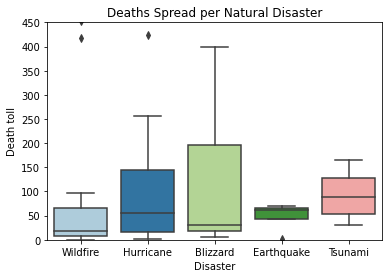

In [58]:
sns.boxplot(x=commonND['Disaster'], y=pd.to_numeric(commonND['Death toll']), palette="Paired").set(title='Deaths Spread per Natural Disaster')
plt.ylim([0,450])

In [ ]:
commonND['Total Cost'].fillna(100, inplace=True)

(0.0, 16000.0)

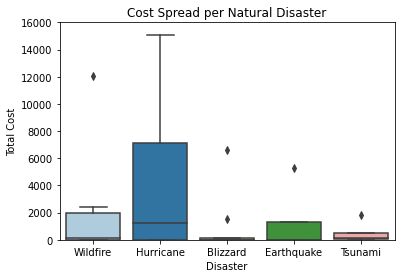

In [108]:
sns.boxplot(x=commonND['Disaster'], y=pd.to_numeric(commonND['Total Cost']), palette="Paired").set(title='Cost Spread per Natural Disaster')
plt.ylim([0,16000])

Regplot betwen deth tolls and total costs

(0.0, 2000.0)

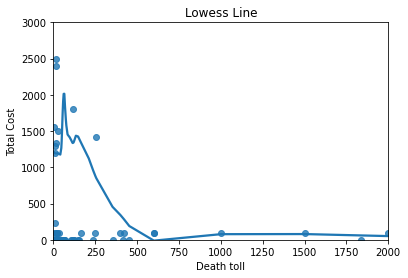

In [84]:
sns.regplot(x=pd.to_numeric(commonND['Death toll']), y=pd.to_numeric(commonND['Total Cost']), lowess=True).set(title='Lowess Line')
plt.ylim([0,3000])
plt.xlim([0,2000])

Barchart showing the most common states in the dataset

In [113]:
df3 = NaturalDisasters['First Location'].value_counts().to_frame().reset_index()
df3 = df3.head(5)
df3

,index,First Location
0,Florida,11
1,California,10
2,Texas,7
3,Louisiana,4
4,Missouri,3


Text(0.5, 0, 'States')

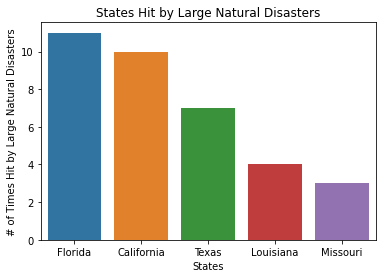

In [105]:
sns.barplot(data=df3, x='index', y='First Location').set(title='States Hit by Large Natural Disasters')
plt.ylabel('# of Times Hit by Large Natural Disasters')
plt.xlabel('States')

Density plot of years for major natural disasters

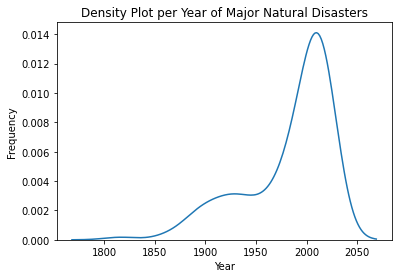

In [112]:
sns.kdeplot(pd.to_numeric(NaturalDisasters['Year']))
plt.ylabel('Frequency')
plt.title('Density Plot per Year of Major Natural Disasters')
plt.show()